<a href="https://www.kaggle.com/fanbyprinciple/netflix-in-xkcd-style?scriptVersionId=85474940" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import matplotlib
from PIL import Image

from wordcloud import WordCloud
import random


# Looking at

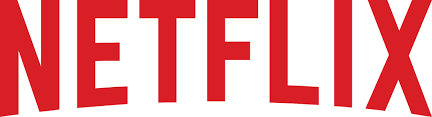
                                **METADATA**
                                
                 

based on code from https://www.dataquest.io/blog/comical-data-visualization-in-python-using-matplotlib/ by https://twitter.com/paridhitweets

In [2]:
movies = pd.read_csv("../input/tv-series-and-movies-on-netflix/movies_on_netflix.csv")
tv_series = pd.read_csv("../input/tv-series-and-movies-on-netflix/tv_series_on_netflix.csv")

movies.head()

,Unnamed: 0,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,season_count
0,0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90.0,Documentaries,"As her father nears the end of his life, filmm...",2021,9.0,0
1,6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,2021,PG,91.0,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021,9.0,0
2,7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125.0,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021,9.0,0
3,9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104.0,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021,9.0,0
4,12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127.0,"Dramas, International Movies",After most of her family is murdered in a terr...,2021,9.0,0


# NETFLIX THROUGH THE YEARS

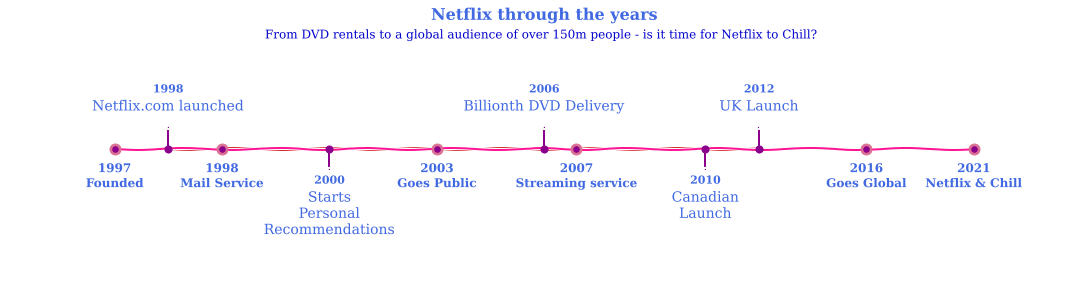

In [3]:
from datetime import datetime

tl_dates = [
"1997\nFounded",
"1998\nMail Service",
"2003\nGoes Public",
"2007\nStreaming service",
"2016\nGoes Global",
"2021\nNetflix & Chill"
]

tl_x = [1, 2, 4, 5.3, 8,9]

tl_sub_x = [1.5,3,5,6.5,7]

tl_sub_times = [
"1998","2000","2006","2010","2012"
]

tl_text = [
"Netflix.com launched",
"Starts\nPersonal\nRecommendations","Billionth DVD Delivery","Canadian\nLaunch","UK Launch"]

with plt.xkcd():
    fig, ax = plt.subplots(figsize=(15, 4), constrained_layout=True)
    ax.set_ylim(-2, 1.75)
    ax.set_xlim(0, 10)

    # Timeline : line
    ax.axhline(0, xmin=0.1, xmax=0.9, c='deeppink', zorder=1)

    # Timeline : Date Points
    ax.scatter(tl_x, np.zeros(len(tl_x)), s=120, c='palevioletred', zorder=2)
    ax.scatter(tl_x, np.zeros(len(tl_x)), s=30, c='darkmagenta', zorder=3)
    # Timeline : Time Points
    ax.scatter(tl_sub_x, np.zeros(len(tl_sub_x)), s=50, c='darkmagenta',zorder=4)

    # Date Text
    for x, date in zip(tl_x, tl_dates):
        ax.text(x, -0.55, date, ha='center',
                fontfamily='serif', fontweight='bold',
                color='royalblue',fontsize=12)

    # Stemplot : vertical line
    levels = np.zeros(len(tl_sub_x))
    levels[::2] = 0.3
    levels[1::2] = -0.3
    markerline, stemline, baseline = ax.stem(tl_sub_x, levels, use_line_collection=True)
    plt.setp(baseline, zorder=0)
    plt.setp(markerline, marker=',', color='darkmagenta')
    plt.setp(stemline, color='darkmagenta')

    # Text
    for idx, x, time, txt in zip(range(1, len(tl_sub_x)+1), tl_sub_x, tl_sub_times, tl_text):
        ax.text(x, 1.3*(idx%2)-0.5, time, ha='center',
                fontfamily='serif', fontweight='bold',
                color='royalblue', fontsize=11)

        ax.text(x, 1.3*(idx%2)-0.6, txt, va='top', ha='center',
            fontfamily='serif',color='royalblue')

    # Spine
    for spine in ["left", "top", "right", "bottom"]:
        ax.spines[spine].set_visible(False)

    # Ticks
    ax.set_xticks([])
    ax.set_yticks([])

    # Title
    ax.set_title("Netflix through the years", fontweight="bold", fontfamily='serif', fontsize=16, color='royalblue')
    ax.text(2.4,1.57,"From DVD rentals to a global audience of over 150m people - is it time for Netflix to Chill?", fontfamily='serif', fontsize=12, color='mediumblue')

    plt.show()

# LOOKING AT MOVIES AND TV SHOWS

In [4]:
len(movies), len(tv_series)

(6131, 2676)

In [5]:
frames = [movies, tv_series]
  
df = pd.concat(frames)

In [6]:
len(df)

8807

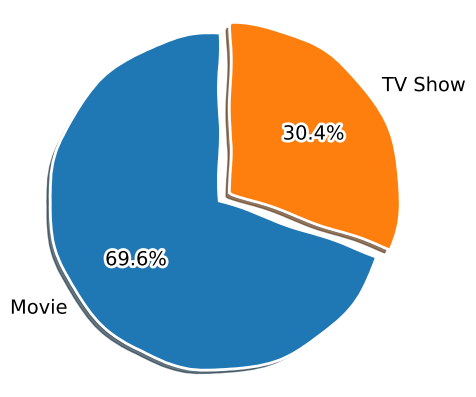

In [7]:
col = "type"
grouped = df[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col})

with plt.xkcd():
    explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'TV Show')
    fig1, ax1 = plt.subplots(figsize=(5, 5), dpi=100)
    ax1.pie(grouped["count"], explode=explode, labels=grouped["type"], autopct='%1.1f%%',
        shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.show()

# COUNTRIES WITH MOST CONTENT

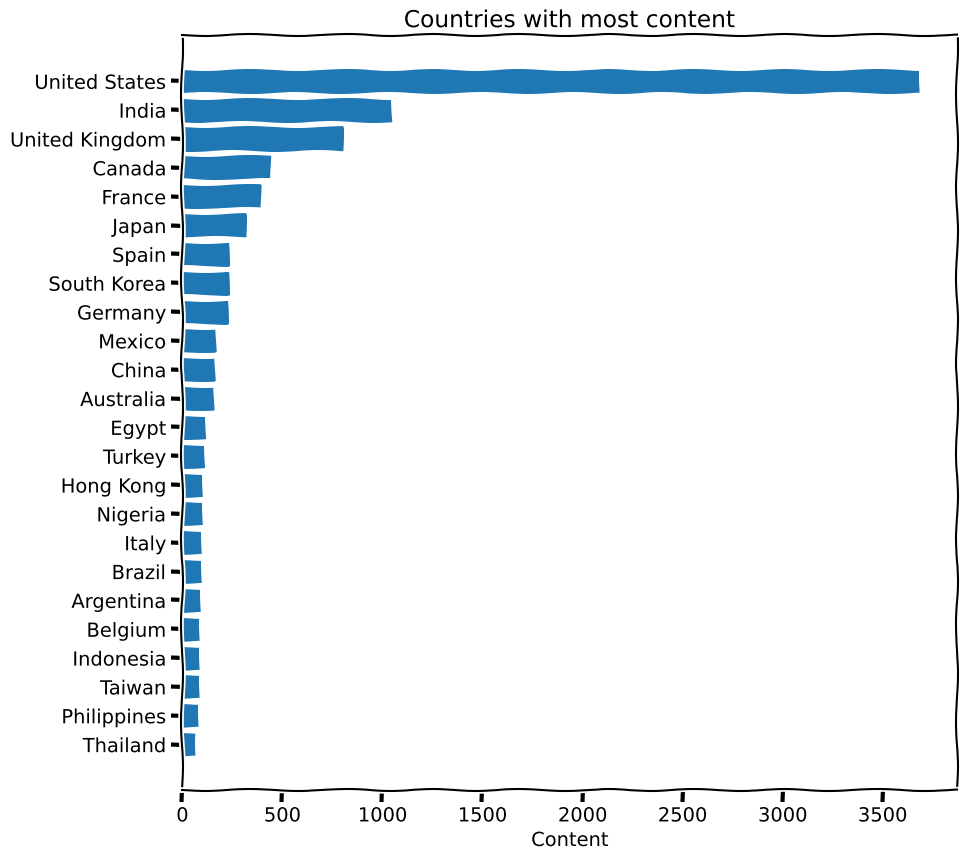

In [8]:
from collections import Counter
col = "country"

categories = ", ".join(df[col].fillna("")).split(", ")
counter_list = Counter(categories).most_common(25)
counter_list = [_ for _ in counter_list if _[0] != ""]
labels = [_[0] for _ in counter_list]
values = [_[1] for _ in counter_list]

with plt.xkcd():
    fig, ax = plt.subplots(figsize=(10, 10), dpi=100)
    y_pos = np.arange(len(labels))
    ax.barh(y_pos, values, align='center')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(labels)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('Content')
    ax.set_title('Countries with most content')

plt.show()

# POPULAR DIRECTORS WITH MOST CONTENT

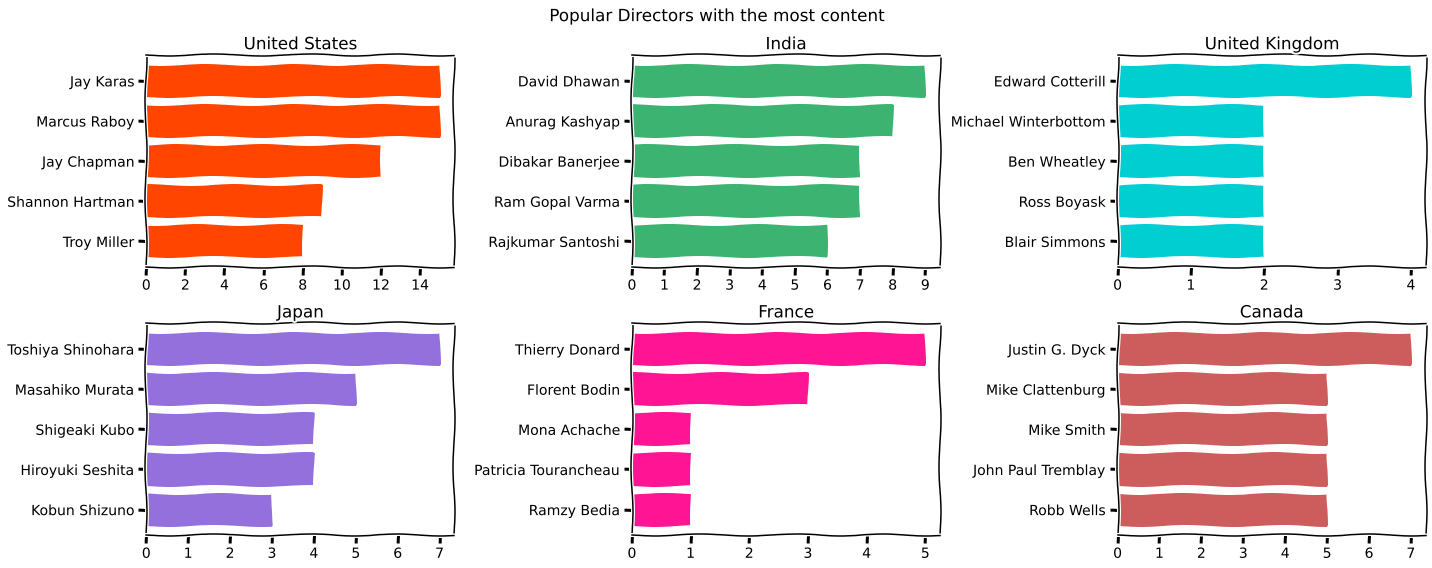

In [9]:
from collections import Counter
from matplotlib.pyplot import figure
import math

colours = ["orangered", "mediumseagreen", "darkturquoise", "mediumpurple", "deeppink", "indianred"]
countries_list = ["United States", "India", "United Kingdom", "Japan", "France", "Canada"]
col = "director"

with plt.xkcd():
    figure(num=None, figsize=(20, 8))
    x=1
    for country in countries_list:
        country_df = df[df["country"]==country]
        categories = ", ".join(country_df[col].fillna("")).split(", ")
        counter_list = Counter(categories).most_common(6)
        counter_list = [_ for _ in counter_list if _[0] != ""]
        labels = [_[0] for _ in counter_list][::-1]
        values = [_[1] for _ in counter_list][::-1]
        if max(values)<10:
            values_int = range(0, math.ceil(max(values))+1)
        else:
            values_int = range(0, math.ceil(max(values))+1, 2)
        plt.subplot(2, 3, x)
        plt.barh(labels,values, color = colours[x-1])
        plt.xticks(values_int)
        plt.title(country)
        x+=1
    plt.suptitle('Popular Directors with the most content')
plt.tight_layout()
plt.show()

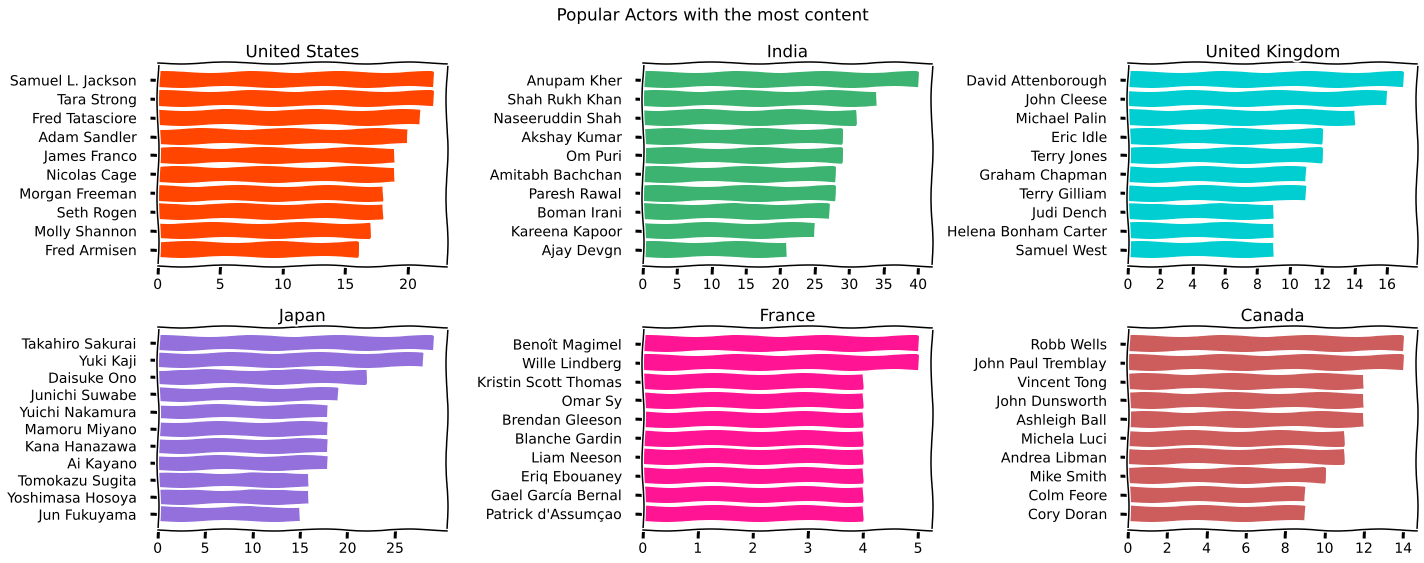

<Figure size 432x288 with 0 Axes>

In [10]:
col = "cast"

with plt.xkcd():
    figure(num=None, figsize=(20, 8))
    x=1
    for country in countries_list:
        df["from_country"] = df['country'].fillna("").apply(lambda x : 1 if country.lower() in x.lower() else 0)
        small = df[df["from_country"] == 1]
        cast = ", ".join(small['cast'].fillna("")).split(", ")
        tags = Counter(cast).most_common(11)
        tags = [_ for _ in tags if "" != _[0]]
        labels, values = [_[0]+"  " for _ in tags][::-1], [_[1] for _ in tags][::-1]
        if max(values)<10:
            values_int = range(0, math.ceil(max(values))+1)
        elif max(values)>=10 and max(values)<=20:
            values_int = range(0, math.ceil(max(values))+1, 2)
        else:
            values_int = range(0, math.ceil(max(values))+1, 5)
        plt.subplot(2, 3, x)
        plt.barh(labels,values, color = colours[x-1])
        plt.xticks(values_int)
        plt.title(country)
        x+=1
    plt.suptitle('Popular Actors with the most content')
    plt.tight_layout()
    plt.show()
    plt.savefig("anupam.png")

# OLDEST MOVIES AND TV SHOWS

In [11]:
small = movies.sort_values("release_year", ascending = True)
small = small[small['duration'] != "0"].reset_index()
small[['title', "release_year"]][:15]

,title,release_year
0,Prelude to War,1942
1,The Battle of Midway,1942
2,Undercover: How to Operate Behind Enemy Lines,1943
3,WWII: Report from the Aleutians,1943
4,Why We Fight: The Battle of Russia,1943
5,The Memphis Belle: A Story of a\nFlying Fortress,1944
6,Tunisian Victory,1944
7,The Negro Soldier,1944
8,Nazi Concentration Camps,1945
9,San Pietro,1945


In [12]:
small = tv_series.sort_values("release_year", ascending = True)
small = small[small['season_count'] != "0"].reset_index()
small = small[['title', "release_year"]][:15]
small


,title,release_year
0,Pioneers: First Women Filmmakers*,1925
1,Five Came Back: The Reference Films,1945
2,Pioneers of African-American Cinema,1946
3,The Twilight Zone (Original Series),1963
4,The Andy Griffith Show,1967
5,Monty Python's Fliegender Zirkus,1972
6,Monty Python's Flying Circus,1974
7,Dad's Army,1977
8,El Chavo,1979
9,Ninja Hattori,1981


# HOW FAST DO WE GET THE CONTENT

In [13]:
df["year_diff"] = df["year_added"]-df["release_year"]
movies["year_diff"] = movies["year_added"]-movies["release_year"]
tv_series["year_diff"] = tv_series["year_added"]- tv_series["release_year"]


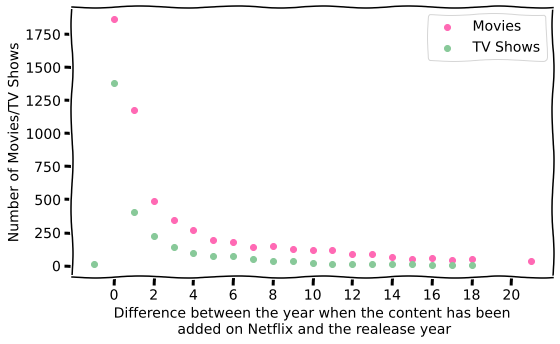

In [14]:
col = "year_diff"
only_movies = movies
only_shows = tv_series

grouped1 = only_movies[col].value_counts().reset_index()
grouped1 = grouped1.rename(columns = {col : "count", "index" : col})
grouped1 = grouped1.dropna()
grouped1 = grouped1.head(20)
grouped2 = only_shows[col].value_counts().reset_index()
grouped2 = grouped2.rename(columns = {col : "count", "index" : col})
grouped2 = grouped2.dropna()
grouped2 = grouped2.head(20)

with plt.xkcd():
    figure(num=None, figsize=(8, 5))
    plt.scatter(grouped1[col], grouped1["count"], color = "hotpink")
    plt.scatter(grouped2[col], grouped2["count"], color = '#88c999')
    values_int = range(0, math.ceil(max(grouped1[col]))+1, 2)
    plt.xticks(values_int)
    plt.xlabel("Difference between the year when the content has been\n added on Netflix and the realease year")
    plt.ylabel("Number of Movies/TV Shows")
    plt.legend(["Movies", "TV Shows"])
    plt.tight_layout()
    plt.show()

# WHAT KIND OF CONTENT IS NETFLIX LOOKING AT

In [15]:
print(df['rating'].unique())

['PG-13' 'PG' 'TV-MA' 'TV-PG' 'TV-14' 'TV-Y' 'R' 'TV-G' 'TV-Y7' 'G'
 'NC-17' '74 min' '84 min' '66 min' 'NR' nan 'TV-Y7-FV' 'UR']


In [16]:
ratings_list = ['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'TV-G', 'TV-Y', 'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV']
ratings_group_list = ['Little Kids', 'Older Kids', 'Teens', 'Mature']
ratings_dict={
'TV-G': 'Little Kids',
'TV-Y': 'Little Kids',
'G': 'Little Kids',
'TV-PG': 'Older Kids',
'TV-Y7': 'Older Kids',
'PG': 'Older Kids',
'TV-Y7-FV': 'Older Kids',
'PG-13': 'Teens',
'TV-14': 'Teens',
'TV-MA': 'Mature',
'R': 'Mature',
'NC-17': 'Mature'
}
for rating_val, rating_group in ratings_dict.items():
    df.loc[df.rating == rating_val, "rating"] = rating_group

In [17]:
df['rating_val']=1
r = 'Little Kids'
grouped = df[df['rating']==r]
year_df = grouped.groupby(['year_added']).sum()
year_df.reset_index(level=0, inplace=True)
len(year_df['rating_val']), len(year_df['year_added']), r, year_df

(9,
 9,
 'Little Kids',
    year_added  Unnamed: 0  release_year  duration  month_added  season_count  \
 0      2013.0        5936          2013     130.0         12.0             0   
 1      2014.0       21920          6026     151.0         29.0             5   
 2      2015.0       91542         26136     492.0        116.0            16   
 3      2016.0      131720         42197     331.0        131.0            26   
 4      2017.0      395905        124889    2683.0        488.0            54   
 5      2018.0      528316        177200    3571.0        628.0            46   
 6      2019.0      476675        205494    3268.0        770.0            81   
 7      2020.0      481350        346791    6379.0       1241.0           128   
 8      2021.0       90994        211886    3037.0        544.0           142   
 
    from_country  year_diff  rating_val  
 0             0        0.0           1  
 1             2       16.0           3  
 2             2       59.0          1

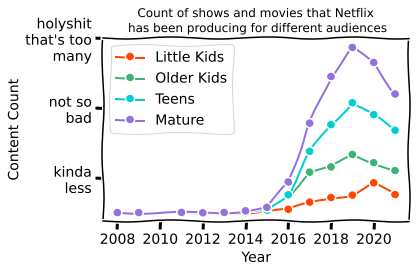

In [18]:

labels=['kinda\nless', 'not so\nbad', 'holyshit\nthat\'s too\nmany']
x=0
with plt.xkcd():
    for r in ratings_group_list:
        grouped = df[df['rating']==r]
        year_df = grouped.groupby(['year_added']).sum()
        year_df.reset_index(level=0, inplace=True)
        plt.plot(year_df['year_added'], year_df['rating_val'], color=colours[x], marker='o')
        values_int = range(2008, math.ceil(max(year_df['year_added']))+1, 2)
        plt.yticks([200, 600, 1000], labels)
        plt.xticks(values_int)
        plt.title('Count of shows and movies that Netflix\n has been producing for different audiences', fontsize=12)
        plt.xlabel('Year', fontsize=14)
        plt.ylabel('Content Count', fontsize=14)
        x+=1
    plt.legend(ratings_group_list)
    plt.tight_layout()
    plt.show()

# TOP GENRES COUNTRYWISE

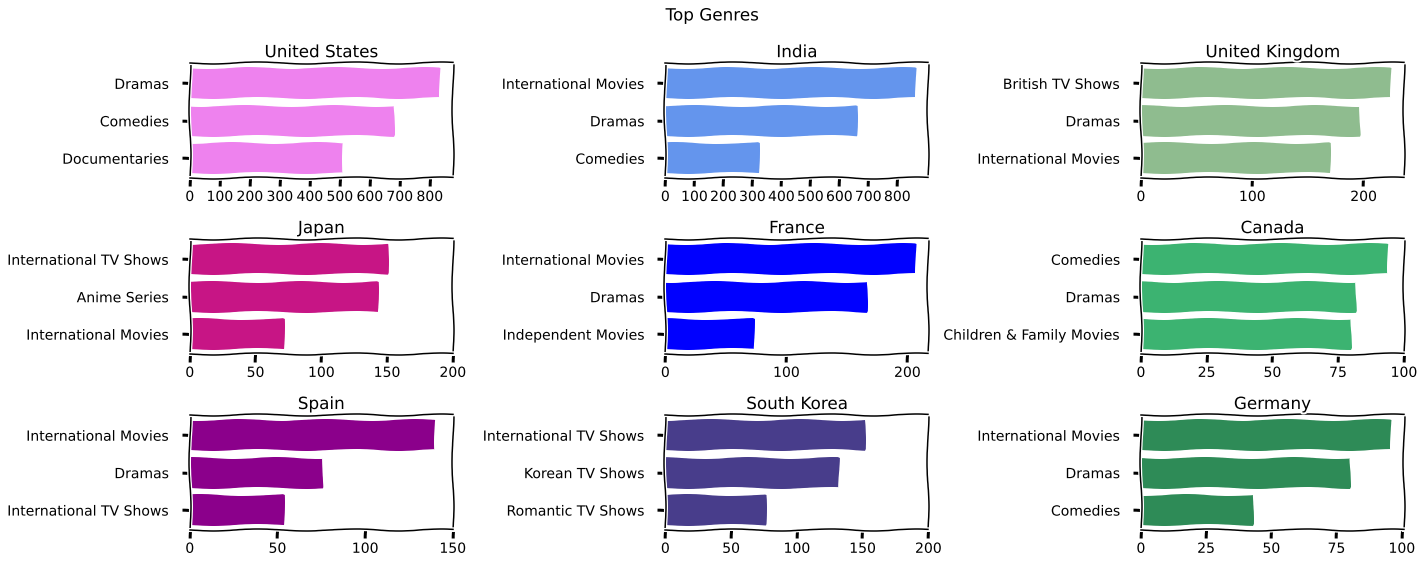

In [19]:
col = "listed_in"
colours = ["violet", "cornflowerblue", "darkseagreen", "mediumvioletred", "blue", "mediumseagreen", "darkmagenta", "darkslateblue", "seagreen"]
countries_list = ["United States", "India", "United Kingdom", "Japan", "France", "Canada", "Spain", "South Korea", "Germany"]

with plt.xkcd():
    figure(num=None, figsize=(20, 8))
    x=1
    for country in countries_list:
        df["from_country"] = df['country'].fillna("").apply(lambda x : 1 if country.lower() in x.lower() else 0)
        small = df[df["from_country"] == 1]
        genre = ", ".join(small['listed_in'].fillna("")).split(", ")
        tags = Counter(genre).most_common(3)
        tags = [_ for _ in tags if "" != _[0]]
        labels, values = [_[0]+"  " for _ in tags][::-1], [_[1] for _ in tags][::-1]
        if max(values)>200:
            values_int = range(0, math.ceil(max(values)), 100)
        elif max(values)>100 and max(values)<=200:
            values_int = range(0, math.ceil(max(values))+50, 50)
        else:
            values_int = range(0, math.ceil(max(values))+25, 25)
        plt.subplot(3, 3, x)
        plt.barh(labels,values, color = colours[x-1])
        plt.xticks(values_int)
        plt.title(country)
        x+=1
    plt.suptitle('Top Genres')
    plt.tight_layout()
    plt.show()

# WORDCLOUD FOR TITLE

we need to get a logo first.

In [20]:
!wget "https://peritract.github.io/assets/images/heart_mask.jpg" -O "logo.jpg"

--2022-01-17 18:40:35--  https://peritract.github.io/assets/images/heart_mask.jpg
Resolving peritract.github.io (peritract.github.io)... 185.199.109.153, 185.199.111.153, 185.199.110.153, ...
Connecting to peritract.github.io (peritract.github.io)|185.199.109.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5447 (5.3K) [image/jpeg]
Saving to: ‘logo.jpg’

logo.jpg            100%[===================>]   5.32K  --.-KB/s    in 0s      

2022-01-17 18:40:35 (36.0 MB/s) - ‘logo.jpg’ saved [5447/5447]



we will generate word cloud

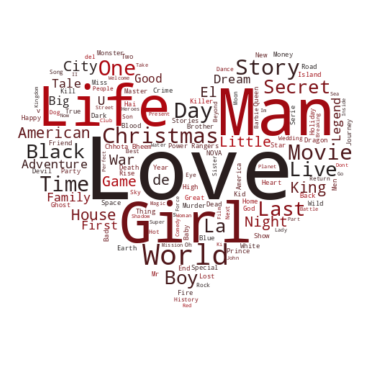

In [21]:
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#221f1f', '#b20710'])
text = str(list(df['title'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '')
mask = np.array(Image.open('./logo.jpg'))
wordcloud = WordCloud(background_color = 'white', width = 500, height = 200,colormap=cmap, max_words = 150, mask = mask).generate(text)

plt.figure( figsize=(5,5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Analysing this data has a very nice application for examples lets say your new year resolution is -
# LOOKING AT ALL MOVIES FROM DIRECTOR DAVID DHAWAN

In [22]:
david = df[df["director"] == "David Dhawan"]["title"]
david

132     Kyo Kii... Main Jhuth Nahin Bolta
1472                      Chashme Baddoor
3218                             Judwaa 2
4256                       Chal Mere Bhai
4265                      Chashme Buddoor
4639                 Haseena Maan Jaayegi
4804                               Judwaa
4989                Maine Pyaar Kyun Kiya
5102                 Mujhse Shaadi Karogi
Name: title, dtype: object

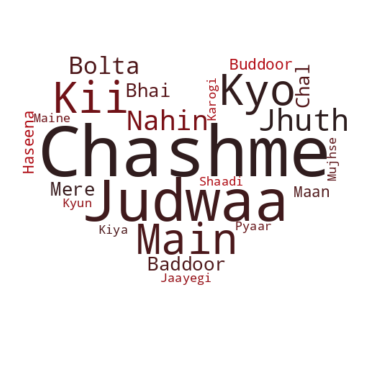

In [23]:
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#221f1f', '#b20710'])
text = str(list(david)).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '')
mask = np.array(Image.open('./logo.jpg'))
wordcloud = WordCloud(background_color = 'white', width = 500, height = 200,colormap=cmap, max_words = 150, mask = mask).generate(text)

plt.figure( figsize=(5,5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

you can!

# LOOKING AT ALL ACTORS THROUGH THE YEARS



In [24]:
all_names =[]
for x in [str(x).split(",") for x in df["cast"]]:
        all_names += x
all_names

['nan',
 'Vanessa Hudgens',
 ' Kimiko Glenn',
 ' James Marsden',
 ' Sofia Carson',
 ' Liza Koshy',
 ' Ken Jeong',
 ' Elizabeth Perkins',
 ' Jane Krakowski',
 ' Michael McKean',
 ' Phil LaMarr',
 'Kofi Ghanaba',
 ' Oyafunmike Ogunlano',
 ' Alexandra Duah',
 ' Nick Medley',
 ' Mutabaruka',
 ' Afemo Omilami',
 ' Reggie Carter',
 ' Mzuri',
 'Melissa McCarthy',
 " Chris O'Dowd",
 ' Kevin Kline',
 ' Timothy Olyphant',
 ' Daveed Diggs',
 ' Skyler Gisondo',
 ' Laura Harrier',
 ' Rosalind Chao',
 ' Kimberly Quinn',
 ' Loretta Devine',
 ' Ravi Kapoor',
 'Luna Wedler',
 ' Jannis Niewöhner',
 ' Milan Peschel',
 ' Edin Hasanović',
 ' Anna Fialová',
 ' Marlon Boess',
 ' Victor Boccard',
 ' Fleur Geffrier',
 ' Aziz Dyab',
 ' Mélanie Fouché',
 ' Elizaveta Maximová',
 'Klara Castanho',
 ' Lucca Picon',
 ' Júlia Gomes',
 ' Marcus Bessa',
 ' Kiria Malheiros',
 ' Fernanda Concon',
 ' Gabriel Lima',
 ' Caio Cabral',
 ' Leonardo Cidade',
 ' Jade Cardozo',
 'nan',
 'Freida Pinto',
 ' Logan Marshall-Green',
 